# Assignment 1 : Filters & Edge Detection
Xiao-Bao Bao
April 10, 2022

<class 'PIL.JpegImagePlugin.JpegImageFile'>
Input img shape:  (600, 800, 3)
Num pixels:  1440000


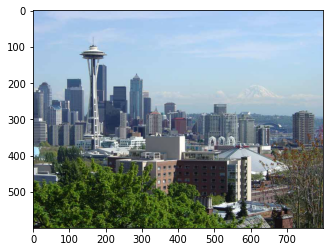

In [1]:
import os
import math
import numpy as np
import scipy as sc
import cv2
from scipy import ndimage
from skimage import filters
from matplotlib import pyplot as plt
# import seaborn as sns
from PIL import Image
# sns.set(context='poster')
from loguru import logger
from sklearn.preprocessing import normalize
%matplotlib inline

seattleImg = Image.open(os.getcwd() + '/hw1_data/Seattle.jpg')
print(type(seattleImg))
seattleImg = np.asarray(seattleImg)
print("Input img shape: ", seattleImg.shape)
print("Num pixels: ", seattleImg.size)
plt.imshow(seattleImg)

In [2]:
def convolve1D(image, filter):
    image = np.asarray(image)
    print("Filter type: ", type(filter))
    filter_length = filter.shape[0]
    source_pix = 0
    print(source_pix)
    sum = 0

    # print(source_pix)
    print("Image shape: ", image.shape)

    for source_pix in range(source_pix, image.shape[0] - int(filter_length/2)*2):
        print("Source index: ", source_pix)
        for j in range(filter_length): 
            sum += filter[j] * image[source_pix + j]
            print(filter[j] , " ", image[source_pix + j], " ", sum)
        # print(sum / filter_length)
        center = source_pix + int(filter_length/2)
        print(center)
        image[center] = int(sum/filter_length)
        sum = 0

    # TODO Need to handle padding

    return image    

box_filter = np.ones((3,), dtype=float)
side_filter = [1, 0, -1]
side_filter = np.array(side_filter, dtype=float)
print(type(side_filter))
print(side_filter.shape)
test_image = [1, 2, 3, 4, 5, 6, 7, 8, 9]

print(convolve1D(test_image, side_filter))

<class 'numpy.ndarray'>
(3,)
Filter type:  <class 'numpy.ndarray'>
0
Image shape:  (9,)
Source index:  0
1.0   1   1.0
0.0   2   1.0
-1.0   3   -2.0
1
Source index:  1
1.0   0   0.0
0.0   3   0.0
-1.0   4   -4.0
2
Source index:  2
1.0   -1   -1.0
0.0   4   -1.0
-1.0   5   -6.0
3
Source index:  3
1.0   -2   -2.0
0.0   5   -2.0
-1.0   6   -8.0
4
Source index:  4
1.0   -2   -2.0
0.0   6   -2.0
-1.0   7   -9.0
5
Source index:  5
1.0   -3   -3.0
0.0   7   -3.0
-1.0   8   -11.0
6
Source index:  6
1.0   -3   -3.0
0.0   8   -3.0
-1.0   9   -12.0
7
[ 1  0 -1 -2 -2 -3 -3 -4  9]


<class 'PIL.PngImagePlugin.PngImageFile'>
Input img shape:  (512, 512, 3)


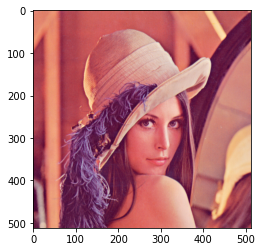

In [3]:
# Open the test image with PIL image
lenna_image = Image.open(os.getcwd() + '/Lenna_(test_image).png')
print(type(lenna_image))
lenna_image = np.asarray(lenna_image)
print("Input img shape: ", lenna_image.shape)
plt.imshow(lenna_image)


In [4]:
# # Open the test image with OpenCV 
# lenna_cv = cv2.imread('Lenna_(test_image).png')
# # lenna_cv = cv.cvtColor(lenna_cv, cv.COLOR_BGR2RGB) only used for converting PIL (BGR) -> CV2 (RGB)
# cv2.imshow('lenna', lenna_cv)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
# Converts the image to gray scale
# def preprocessImage(image):
#     cv_image = cv2.imread(image)
#     return cv2.cvtColor(cv_image, cv2.COLOR_BGR2GRAY)

In [6]:

def load_image(image_path):
    """
    Load the image using opencv
    :param image_path: <String> Path of input_image
    """
    coloured_image = cv2.imread(image_path)
    grey_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    print('image matrix size: ', grey_image.shape)
    print('\n First 5 columns and rows of the image matrix: \n', grey_image[:5, :5])
    cv2.imwrite('TopLeft5x5.jpg', grey_image[:5, :5])
    return grey_image

input_image = load_image(os.getcwd() + '/Lenna_(test_image).png')

image matrix size:  (512, 512)

 First 5 columns and rows of the image matrix: 
 [[162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]
 [162 162 162 161 162]]


In [7]:
# Takes 2d image and kernal numpy array objects using element-wise multiplication
# Performance: O(n^2)
def convolve(image, kernel):
    """
    This function which takes an image and a kernel and returns the convolution of them.

    :param image: a numpy array of size [image_height, image_width].
    :param kernel: a numpy array of size [kernel_height, kernel_width].
    :return: a numpy array of size [image_height, image_width] (convolution output).
    """
    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    paddist_x = int(math.ceil(kernel_width/2))
    paddist_y = int(math.ceil(kernel_height/2))

    # print("padding x: ", paddist_x)
    # print("padding y: ", paddist_y)

    # convolution output
    output = np.zeros_like(image)

    # print(image.shape)
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2*paddist_y, 
                                image.shape[1] + 2*paddist_x))
    # print(image_padded.shape)
    # print(paddist_x)
    
    # print((image.shape[0]+paddist_y))
    # print((image.shape[1]+paddist_x))

    image_padded[(paddist_y):(image.shape[0]+paddist_y),
                    (paddist_x):(image.shape[1]+paddist_x)] = image

    kernel_padded = np.zeros_like(kernel)
    max_dim = max(kernel_width, kernel_height)

    # print("kernel: ", kernel.shape)
    # print("conv shape: ", image_padded[1: 1+max_dim, 1: 1+max_dim].shape)
    # print("\t img w/ padding: ", image_padded.shape)

    # If kernel size is not uniform, force it to be
    if kernel_width != kernel_height:
        max_dim = max(kernel_width, kernel_height)
        kernel_padded = np.zeros((max_dim, max_dim))
    # print("kernel padded shape: ", kernel_padded.shape)
    # kernel_padded[:kernel_width, :kernel_height] = kernel[:, :]
    # print(kernel)
    # print(kernel_padded)
    # Loop over every pixel of the image
    for x in range(image.shape[1]):
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            sum = (kernel * image_padded[y: y+kernel_height, x: x+kernel_width]).sum()
            # print(sum)
            # if sum < 0:
            #     sum = 0
            # elif sum > 255:
            #     sum = 255
            output[y, x] = sum
            # test = image_padded[y: y+max_dim, x: x+max_dim].shape
    
    # print("test ", test)
    # print(output.dtype)
    return output

Corner values:  [[  0  94  94  94  95  94  99  93  95  91]
 [ 94 230  68  69  64  74  47  78  60  82]
 [ 94  68 162 163 159 168 146 171 155 173]
 [ 94  68 162 163 159 168 146 171 155 173]
 [ 94  68 162 163 159 168 146 171 155 173]
 [ 94  66 160 167 165 169 144 175 156 178]
 [ 92  78 176 146 137 169 156 154 164 156]
 [ 96  61 154 184 155 161 173 162 145 158]
 [ 97  65 166 138 156 155 159 148 157 155]
 [101  50 148 165 158 164 171 157 151 181]]


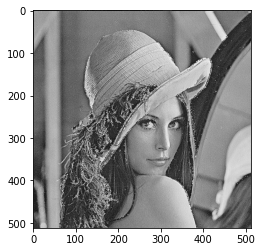

In [8]:
# kernel to be used to get sharpened image
KERNEL = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
image_sharpen = convolve(input_image, kernel=KERNEL)
cv2.imwrite('sharpened_image.jpg', image_sharpen)
plt.imshow(cv2.cvtColor(image_sharpen, cv2.COLOR_GRAY2RGB))
print("Corner values: ", image_sharpen[:10, :10])

In [9]:
lena_img_red = lenna_image[:, :, 0]
print("Original img: \n")
print(lena_img_red)

Original img: 

[[226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 [226 226 223 ... 230 221 200]
 ...
 [ 84  84  92 ... 173 172 177]
 [ 82  82  96 ... 179 181 185]
 [ 82  82  96 ... 179 181 185]]


In [10]:
# Takes a 2D image matrix and returns a summed table by recursively adding
def getTableSum(image):
    
    # copy the image over to a new array
    image2d = np.copy(image)
    image2d = np.array(image2d, dtype=np.float64)
    print(image2d)
    # print(image2d.shape)
    img_width = image2d.shape[1]
    img_height = image2d.shape[0]

    # output = np.zeros_like(image2d, dtype=np.int64)

    # Compute sum of elements row-wise
    # i represents the current y-val, j represents to x-val
    for i in range(img_height):
        # print(i)
        for j in range(1, img_width):
            # print("\t", image2d[i, j])
            # print("current ", image2d[i, j], "\t left val: ", image2d[i, j - 1])
            image2d[i, j] = float(image2d[i, j]) + float(image2d[i, j - 1])
            # print("\n new val sum: ", image2d[i, j])

    print("After row-wise addition: \n", image2d)
    print(image2d.shape)

    # Compute sum of elements col-wise
    # Let i represent the current y-val, j represent the current x-val
    for i in range(img_height):
        for j in range(1, img_width):
            image2d[j, i] = float(image2d[j, i]) + float(image2d[j - 1, i])
    
    print("After col-wise addition: \n", image2d)
    print(image2d.shape)
    # return output
    return image2d

sumTable = getTableSum(lena_img_red)
print("Summed area image: \n")
print(sumTable[:5, :5])

[[226. 226. 223. ... 230. 221. 200.]
 [226. 226. 223. ... 230. 221. 200.]
 [226. 226. 223. ... 230. 221. 200.]
 ...
 [ 84.  84.  92. ... 173. 172. 177.]
 [ 82.  82.  96. ... 179. 181. 185.]
 [ 82.  82.  96. ... 179. 181. 185.]]
After row-wise addition: 
 [[2.26000e+02 4.52000e+02 6.75000e+02 ... 1.04541e+05 1.04762e+05
  1.04962e+05]
 [2.26000e+02 4.52000e+02 6.75000e+02 ... 1.04541e+05 1.04762e+05
  1.04962e+05]
 [2.26000e+02 4.52000e+02 6.75000e+02 ... 1.04541e+05 1.04762e+05
  1.04962e+05]
 ...
 [8.40000e+01 1.68000e+02 2.60000e+02 ... 8.87090e+04 8.88810e+04
  8.90580e+04]
 [8.20000e+01 1.64000e+02 2.60000e+02 ... 8.87730e+04 8.89540e+04
  8.91390e+04]
 [8.20000e+01 1.64000e+02 2.60000e+02 ... 8.87730e+04 8.89540e+04
  8.91390e+04]]
(512, 512)
After col-wise addition: 
 [[2.2600000e+02 4.5200000e+02 6.7500000e+02 ... 1.0454100e+05
  1.0476200e+05 1.0496200e+05]
 [4.5200000e+02 9.0400000e+02 1.3500000e+03 ... 2.0908200e+05
  2.0952400e+05 2.0992400e+05]
 [6.7800000e+02 1.3560000e+03

In [11]:
print(np.array([3,2]))

[3 2]


In [12]:
# The general idea is that you apply the filter weights first
# So pre-multiply the sliced cells you're convolving with the kernel
# weights. Then, build the integral sum table of the image after the kernel
# filter has assed by the image. 
# Finally, compute the sum of the sliced cells within the kernel size
# window and output that sum to the output matrix

# Add zero padding to the image prior to any convolving
# Make sure you only convolve a window and avoid multiplying zeroes by the weights

mat1 = np.array([[1, 1, 1], [1, 10, 1], [1, 1, 1]])
mat2 = np.array([[0.1, 0.1, 0.1],[0.1, 0.2, 0.1], [0.1, 0.1, 0.1]])

mat_sum = getTableSum(mat1)

mat3 = mat_sum * mat2

print(mat3)


[[ 1.  1.  1.]
 [ 1. 10.  1.]
 [ 1.  1.  1.]]
After row-wise addition: 
 [[ 1.  2.  3.]
 [ 1. 11. 12.]
 [ 1.  2.  3.]]
(3, 3)
After col-wise addition: 
 [[ 1.  2.  3.]
 [ 2. 13. 15.]
 [ 3. 15. 18.]]
(3, 3)
[[0.1 0.2 0.3]
 [0.2 2.6 1.5]
 [0.3 1.5 1.8]]


In [13]:
# Computes the sum based on the kernel size and the bottom rightmost point
def computeSum(sumTable, kernelShape=(2,2), coordinate=(2,2)):
    """Takes an integral sum table, """
    # Get the bottom right coords
    x2 = coordinate[0]
    y2 = coordinate[1]
    # Get the top left coords
    x1 = x2 - kernelShape[1]
    y1 = y2 - kernelShape[0]

    sum = sumTable[y2, x2] - sumTable[y2, x1] - sumTable[y1, x2] + sumTable[y1, x1]
    return sum
    
print(computeSum(mat3))

1.3


In [14]:
def zeroPadding(image, kernel=(5,5)):

    dist_padding_x = 2
    dist_padding_y = 2
    if kernel[0]>2:
        dist_padding_x = int(kernel[0]/2)
    elif kernel[1]>2:
        dist_padding_y = int(kernel[1]/2)
    num_channels = 0
    if len(image.shape) > 2:
        num_channels = image.shape[2]

    output = np.zeros((image.shape[0] + dist_padding_y, image.shape[1] + dist_padding_x, num_channels))
    for c in range(num_channels):
        img_padded = np.zeros((image.shape[0] + dist_padding_y, image.shape[1] + dist_padding_x))
        img_padded[1: -1, 1: -1] = image[:, :, c]
        output[:, :, c] = img_padded[:, :]
    return output

image_padded = zeroPadding(lenna_image)
print(image_padded.shape)
for c in range(3):
    print("Image with zero padding \n", image_padded[:5, :5, c])

(514, 514, 3)
Image with zero padding 
 [[  0.   0.   0.   0.   0.]
 [  0. 226. 226. 223. 223.]
 [  0. 226. 226. 223. 223.]
 [  0. 226. 226. 223. 223.]
 [  0. 226. 226. 223. 223.]]
Image with zero padding 
 [[  0.   0.   0.   0.   0.]
 [  0. 137. 137. 137. 136.]
 [  0. 137. 137. 137. 136.]
 [  0. 137. 137. 137. 136.]
 [  0. 137. 137. 137. 136.]]
Image with zero padding 
 [[  0.   0.   0.   0.   0.]
 [  0. 125. 125. 133. 128.]
 [  0. 125. 125. 133. 128.]
 [  0. 125. 125. 133. 128.]
 [  0. 125. 125. 133. 128.]]


In [15]:
# Takes an image of n-channels, a kernal, and returns a new matrix with convolved values

"""
def convolve2d(image, kernel):
    
    # This function which takes an image and recursively adds the top and left grid
    # values to each node.

    # :param image: a numpy array of size [image_height, image_width]
    # :param kernel: a numpy array of size[kernel_height, kernel_width]
    # :return: a numpy array of size [image_height - kernel_height, image_width - kernel_width] (convolve values).
    
    # # Stuff for images with n > 0 channels
    # num_channels = 0
    # if len(image.shape) > 2:
    #     if image.shape[2] > 0:
    #         num_channels = image.shape[2]

    image_sum = getTableSum(image)

    # Pad the image border with zeroes that adds kernel_width // 2, kernel_height // 2 to each side
    image_padded = zeroPadding(image_sum, kernel.shape)
    output = np.zeros_like(image_padded)

    # Flip the kernel
    kernel = np.flipud(np.fliplr(kernel))
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]

    image_width = image.shape[1]
    image_height = image.shape[0]

    kernel_window = np.array([[]])

    temp_img = np.zeros_like(image)
    output = np.zeros_like(image)

    # Grab the coordinates for a window centered on (x,y), 
    # where bottom-right -> (x+kernel_width/2,  y+kernel_height/2)
    # and top-left -> (x-kernel_width/2,  y-kernel_height/2)
    x_start = int(kernel_width/2)
    y_start = int(kernel_height/2)

    # # Iterate through each color channel
    # for c in range(num_channels):
    # Iterate through all pixels image_width, image_height
    for i in range(y_start, image_height - y_start):
        for j in range(x_start, image_width - x_start):
            # Multiply kernel window values by the kernel weights
            kernel_window[:, :] = image_padded[j-y_start:j+y_start, i-x_start:i+x_start]
            temp_img[j-kernel_window[1]:j, i-kernel_window[0]:i] = (kernel_window * kernel) / kernel.size

    # Calculate the sum within the kernel window dims and append to output array
    for i in range(image_height):
        for j in range(image_width):
            output[j, i] = computeSum(temp_img, kernel.shape, coordinate=(i, j))
    
    return output
"""


'\ndef convolve2d(image, kernel):\n    \n    # This function which takes an image and recursively adds the top and left grid\n    # values to each node.\n\n    # :param image: a numpy array of size [image_height, image_width]\n    # :param kernel: a numpy array of size[kernel_height, kernel_width]\n    # :return: a numpy array of size [image_height - kernel_height, image_width - kernel_width] (convolve values).\n    \n    # # Stuff for images with n > 0 channels\n    # num_channels = 0\n    # if len(image.shape) > 2:\n    #     if image.shape[2] > 0:\n    #         num_channels = image.shape[2]\n\n    image_sum = getTableSum(image)\n\n    # Pad the image border with zeroes that adds kernel_width // 2, kernel_height // 2 to each side\n    image_padded = zeroPadding(image_sum, kernel.shape)\n    output = np.zeros_like(image_padded)\n\n    # Flip the kernel\n    kernel = np.flipud(np.fliplr(kernel))\n    kernel_width = kernel.shape[0]\n    kernel_height = kernel.shape[1]\n\n    image_widt

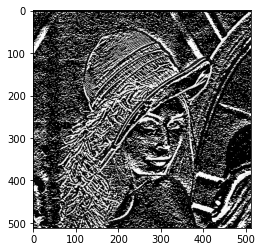

In [16]:
imagesobel = convolve(input_image, kernel=np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])/9.0)
cv2.imwrite('sobel_horizontal.jpg', imagesobel)
plt.imshow(cv2.cvtColor(imagesobel, cv2.COLOR_GRAY2RGB))

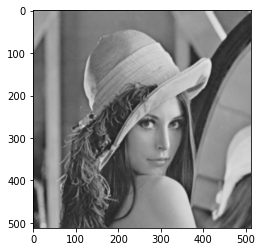

In [17]:
# kernel to be used for box blur
imageboxblur = convolve(input_image,
                         kernel=np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])/9.0)
cv2.imwrite('box_blur.jpg', imageboxblur)
plt.imshow(cv2.cvtColor(imageboxblur, cv2.COLOR_GRAY2RGB))


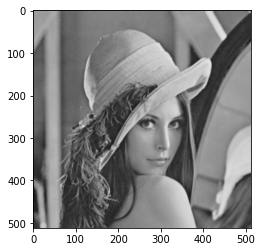

In [18]:
# kernel to be used for gaussian blur
imagegaussianblur = convolve(input_image,
                         kernel=np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16.0)
cv2.imwrite('gaussian_blur.jpg', imagegaussianblur)
plt.imshow(cv2.cvtColor(imagegaussianblur, cv2.COLOR_GRAY2RGB))

## 1. 

In [19]:
def GaussianBlurImage(image, sigma)->Image:
    filter_size = 2 * int(sigma * 4 + 0.5) + 1
    print(f'filter size: {filter_size}')
    gaussian_filter = np.zeros((filter_size, filter_size), np.float32)

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2
            y = j - filter_size // 2
            # print(x, y)
            gaussian_filter[i, j] = (1.0 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2)/(2 * sigma ** 2)))
    
    print("Gaussian Filter shape: ", gaussian_filter.shape)

    # PERFORM CONVOLUTION
    image_filtered = np.zeros_like(image, dtype=np.int64)
    for c in range(3): # 3 is chosen since the image is [x pix, y pix, n channels] where n = 3
        # image_filtered[:, :, c] = sc.ndimage.convolve(image[:, :, c], gaussian_filter, mode='constant', cval=0.0)
        # print(image_filtered[:, :, c])
        image_filtered[:, :, c] = convolve(image[:, :, c], kernel=gaussian_filter)

    # image_filtered = np.clip(image_filtered, 0, 255).astype(np.int8)
    return image_filtered

filter size: 33
Gaussian Filter shape:  (33, 33)


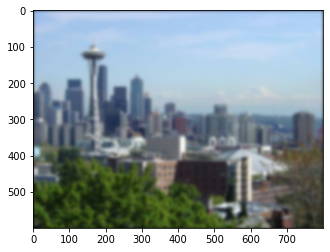

In [20]:
filtered_img = np.asarray(GaussianBlurImage(seattleImg, 4.0))
# print(filtered_img.shape, type(filtered_img))
plt.imshow(filtered_img)

### 2. 

filter size: 33
(1, 33)
[[9.94718354e-03 9.64114163e-03 8.77835881e-03 7.50852842e-03
  6.03327202e-03 4.55415249e-03 3.22937779e-03 2.15122942e-03
  1.34620501e-03 7.91393046e-04 4.37048759e-04 2.26737917e-04
  1.10503235e-04 5.05920652e-05 2.17593770e-05 8.79158324e-06
  3.33690855e-06 1.18981131e-06 3.98536883e-07 1.25405194e-07
  3.70697038e-08 1.02938849e-08 2.68532041e-09 6.58066046e-10
  1.51495413e-10 3.27631811e-11 6.65624370e-12 1.27036641e-12
  2.27764124e-13 3.83617393e-14 6.06970850e-15 9.02181674e-16
  1.25972778e-16]]


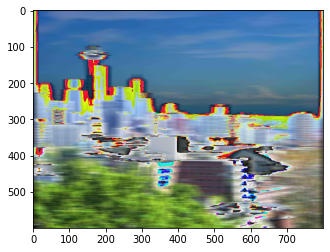

In [21]:
def SeperableGaussianBlurImage(image, sigma):
    filter_size = 2 * int(sigma * 4 + 0.5) + 1
    print(f'filter size: {filter_size}')

    # gaussian_filter_x = np.zeros((filter_size), np.float32)
    gaussian_filter_x = np.zeros((1, filter_size), dtype=np.float32)
    # gaussian_filter_y = np.zeros((filter_size), np.float32)
    gaussian_filter_y = np.zeros((filter_size, 1), dtype=np.float32)

    # 1.0 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2)/(2 * sigma ** 2))

    print(gaussian_filter_x.shape)
    # print(gaussian_filter_y.shape)

    for i in range(filter_size):
        val = 1.0 / (2 * np.pi * sigma ** 2) * np.exp(- (i ** 2)/(2*sigma**2))
        gaussian_filter_x[0][i] = val
        gaussian_filter_y[i][0] = val

    print(gaussian_filter_x)

    # gaussian_filter_y = np.transpose(gaussian_filter_y)
    # print(gaussian_filter_y)

    output = np.zeros_like(image, dtype=np.int64)
    
    # Perform two 1D convolutions with each filter
    for c in range(image.shape[2]):
        output[:, :, c] = convolve(image[:, :, c], kernel=gaussian_filter_x)
        output[:, :, c] = convolve(image[:, :, c], kernel=gaussian_filter_y)
    # print("Gaussian Filter shape: ", gaussian_filter.shape)
    return output

plt.imshow(SeperableGaussianBlurImage(seattleImg, 4.0))

### 3. 

<class 'PIL.PngImagePlugin.PngImageFile'>
Input img shape:  (334, 500, 3)
Num pixels:  501000


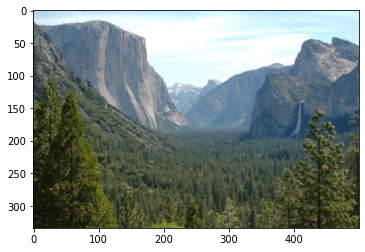

In [22]:
yosemiteImg = Image.open(os.getcwd() + '/hw1_data/Yosemite.png')
print(type(yosemiteImg))
yosemiteImg = np.asarray(yosemiteImg)
print("Input img shape: ", yosemiteImg.shape)
print("Num pixels: ", yosemiteImg.size)
plt.imshow(yosemiteImg)

filter size: 9
Gaussian Filter shape:  (9, 9)
int64
(334, 500, 3)
(334, 500, 3)
(334, 500, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


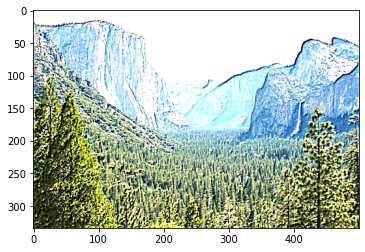

In [23]:
def SharpenImage(image, sigma, alpha):

    image = np.array(image, dtype=np.float64)
    output = np.zeros_like(image, dtype=np.float64)
    gaussian_filtered = GaussianBlurImage(image, sigma)
    print(gaussian_filtered.dtype)
    print(gaussian_filtered.shape)
    print(output.shape)
    print(image.shape)

    for c in range(image.shape[2]):
        for j in range(image.shape[0]):
            for i in range(image.shape[1]):
                # print(image[j, i, c])
                # print(alpha * gaussian_filtered[j, i, c])
                # val = image[j, i, c] + (image[j, i, c] - alpha * gaussian_filtered[j, i, c])
                val = (image[j, i, c] - alpha * (gaussian_filtered[j, i, c] - image[j, i, c]))
                # if val < 0:
                #     val = 0
                #     # print("smol")
                # elif val > 255:
                #     val = 255
                    # print("big")
                output[j, i, c] = image[j, i, c] + val
    output = np.array(output, dtype=np.int32)
    return output

plt.imshow(SharpenImage(yosemiteImg, 1.0, 5.0))

### 4

image matrix size:  (321, 481)

 First 5 columns and rows of the image matrix: 
 [[59 59 59 59 59]
 [59 59 59 59 59]
 [60 60 60 60 60]
 [60 60 60 60 61]
 [60 60 61 61 62]]
(321, 481)


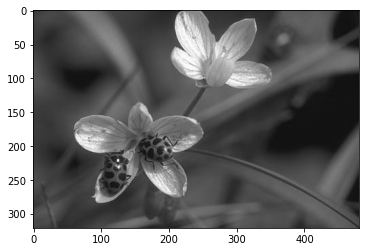

In [24]:
ladybug_image = load_image(os.getcwd() + '/hw1_data/LadyBug.jpg')
print(ladybug_image.shape)
plt.imshow(cv2.cvtColor(ladybug_image, cv2.COLOR_RGB2BGR))

(321, 481)
[[ 7 10  1  8 15 14 13  8  4 10]
 [10 12 15 14 12  5  6 13  6  1]
 [10  8  3  8 14  6  4  8 15 12]
 [14 12 13  8 13 12  5 11  7  8]
 [ 5 11 14 11 15  9  6 12 10  9]
 [13 15  9 15  8  8  8  8 11  5]
 [10 13  8 12  4 12  9 13  8  2]
 [ 7 10 11 12  6 14 10  5 12  9]
 [ 2  5 12 15  5 15 10 11  9 11]
 [ 4  9 11 15 13 15 12 15  5  6]]


True

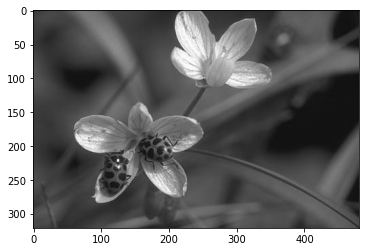

In [34]:
def SobelImage(image):
    sobel_filter_y = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])
    sobel_filter_x = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0],[-1.0, 0.0, 1.0]])

    # print(sobel_magnitude)

    output = np.zeros_like(image, dtype=np.float64)
    # filteredImg_y = np.zeros_like(image, dtype=np.int64)

    # for c in image.shape[2]:

    # test_kernel = np.array([[1.4, -2, 1.4], [-2, 0, -2], [1.4, -2, 1.4]], dtype=np.float32)

    output_x = convolve(image, kernel=sobel_filter_x)
    output_y = convolve(image, kernel=sobel_filter_y)

    sobel_magnitude = np.zeros_like(image, dtype=np.float32)
    sobel_magnitude = np.sqrt((output_x*output_x) + (output_y*output_y))
    # normed_matrix = normalize(mag_filtered, axis=1, norm='l1')
    # print(normed_matrix)
    # filteredImg_y = convolve(filteredImg_x, kernel=sobel_filter_y)
    # output = np.zeros((image.shape[0], image.shape[1]), dtype=np.int64)

    # print(filteredImg_x[:10, :10])
    # print(filteredImg_y[:10, :10])

    # plt.imshow(cv2.cvtColor(filteredImg_x, cv2.COLOR_RGB2BGR))
    # plt.imshow(cv2.cvtColor(filteredImg_y, cv2.COLOR_RGB2BGR))

    # print(output.shape)
    # print(image.shape)

    # for j in range(output.shape[0]):
    #     for i in range(output.shape[1]):
    #         output[j, i] = math.sqrt((filteredImg_x[j, i]**2) + (filteredImg_y[j, i]**2))

    # print(output[200:210, 150:160])

    sobel_magnitude = np.array(sobel_magnitude, dtype=np.int64)

    # print(output[200:210, 150:160])
    print(sobel_magnitude.shape)
    return sobel_magnitude

plt.imshow(cv2.cvtColor(ladybug_image, cv2.COLOR_GRAY2BGR))

filtered_ladybug = SobelImage(ladybug_image)

print(filtered_ladybug[200:210, 150:160])
# plt.imshow(filtered_ladybug)
cv2.imwrite("sobel_ladybug.png", filtered_ladybug*1.0)